# Evaluation metric

- Evaluation metric **Version B** (executed cell 10) is the currently used version (2021-06-29)
- Other metrics
    - https://scikit-learn.org/stable/model_selection.html
    - https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226

In [1]:
# load results

import yaml
import os.path
import pickle

# Set data paths
config          = yaml.safe_load(open("../config.yaml", "r"))
results_file = os.path.join(config["EXPERIMENTS_DIRECTORY"], "results_a")

print(results_file)
if os.path.isfile(results_file):
    with open(results_file, "rb") as handle:
        results = pickle.load(handle)

/home/project/project/data/amazon/results_a


In [2]:
# remove cosine similarity, as it contains no p-values
del results["bow_50"]["CosineDetector"]
del results["bow_768"]["CosineDetector"]

# remove AlibiChiSquaredDetector, as every value is around 0.5
del results["bow_50"]["AlibiChiSquaredDetector"]
del results["bow_50"]["AlibiChiSquaredDetector-FDR"]

In [3]:
# percent of injected words

import numpy
target_percentages = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
negative_words_percentage = numpy.divide(target_percentages, 2)
print("negative_words_percentage", negative_words_percentage)

negative_words_percentage [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5  ]


In [4]:
fake_predictions = negative_words_percentage
fake_predictions[0] = .0012
fake_predictions = numpy.divide(.001, fake_predictions)
results['bow_50']['fake'] = {}
results['bow_50']['fake']['predictions'] = fake_predictions
results['bow_768']['fake'] = {}
results['bow_768']['fake']['predictions'] = fake_predictions
print(fake_predictions)

fake_predictions = negative_words_percentage
fake_predictions[0] = .012
fake_predictions = numpy.divide(.01, fake_predictions)
results['bow_50']['fake2'] = {}
results['bow_50']['fake2']['predictions'] = fake_predictions
results['bow_768']['fake2'] = {}
results['bow_768']['fake2']['predictions'] = fake_predictions
print(fake_predictions)

fake_predictions = [0] * 21
fake_predictions[0] = 1
results['bow_50']['perfect'] = {}
results['bow_50']['perfect']['predictions'] = fake_predictions
results['bow_768']['perfect'] = {}
results['bow_768']['perfect']['predictions'] = fake_predictions
print(fake_predictions)

fake_predictions = [1] * 21
fake_predictions[0] = 0
results['bow_50']['bad'] = {}
results['bow_50']['bad']['predictions'] = fake_predictions
results['bow_768']['bad'] = {}
results['bow_768']['bad']['predictions'] = fake_predictions
print(fake_predictions)

[0.83333333 0.04       0.02       0.01333333 0.01       0.008
 0.00666667 0.00571429 0.005      0.00444444 0.004      0.00363636
 0.00333333 0.00307692 0.00285714 0.00266667 0.0025     0.00235294
 0.00222222 0.00210526 0.002     ]
[0.83333333 0.4        0.2        0.13333333 0.1        0.08
 0.06666667 0.05714286 0.05       0.04444444 0.04       0.03636364
 0.03333333 0.03076923 0.02857143 0.02666667 0.025      0.02352941
 0.02222222 0.02105263 0.02      ]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [5]:
# plot results

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt

def plot_results():
    linewidth=1.5
    fig, ax = plt.subplots()
    ax.plot(negative_words_percentage, results["bow_50"]["fake"]["predictions"], '--', label='fake', color='tab:gray', linewidth=linewidth)
    ax.plot(negative_words_percentage, results["bow_50"]["fake2"]["predictions"], ':', label='fake2', color='tab:gray', linewidth=linewidth)
    ax.plot(negative_words_percentage, results["bow_50"]["perfect"]["predictions"], '-.', label='perfect', color='tab:gray', linewidth=linewidth)
    ax.plot(negative_words_percentage, results["bow_50"]["bad"]["predictions"], '-.', label='bad', color='#cccccc', linewidth=linewidth)
    ax.plot(negative_words_percentage, results["bow_50"]["AlibiKSDetector"]["predictions"], label='KS', color='tab:green', linewidth=linewidth)
    ax.plot(negative_words_percentage, results["bow_50"]["AlibiLSDDDetector"]["predictions"], label='LSDD', color='tab:orange', linewidth=linewidth)
    ax.plot(negative_words_percentage, results["bow_50"]["AlibiMMDDetector"]["predictions"], '--', label='MMD', color='tab:red', linewidth=linewidth)
    ax.plot(negative_words_percentage, results["bow_50"]["FCITDetector"]["predictions"], ':', label='FCIT', color='tab:blue', linewidth=linewidth)
    ax.plot(negative_words_percentage, results["bow_50"]["CDBDDetector"]["predictions"], ':', label='CDBD', color='tab:purple', linewidth=linewidth)
    plt.legend(loc='center right')
    ax.set(xlabel='Percentage of injected negative words', ylabel='p-value',
           title='Drift detection: Bag of Words with 50 dimensions')
    ax.grid(color='#dddddd')
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    fig.set_size_inches(9, 5)
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(negative_words_percentage, results["bow_768"]["fake"]["predictions"], '--', label='fake', color='tab:gray', linewidth=linewidth)
    ax.plot(negative_words_percentage, results["bow_768"]["fake2"]["predictions"], ':', label='fake2', color='tab:gray', linewidth=linewidth)
    ax.plot(negative_words_percentage, results["bow_768"]["perfect"]["predictions"], '-.', label='perfect', color='tab:gray', linewidth=linewidth)
    ax.plot(negative_words_percentage, results["bow_768"]["bad"]["predictions"], '-.', label='bad', color='#cccccc', linewidth=linewidth)
    ax.plot(negative_words_percentage, results["bow_768"]["AlibiKSDetector"]["predictions"], label='KS', color='tab:green', linewidth=linewidth)
    ax.plot(negative_words_percentage, results["bow_768"]["AlibiLSDDDetector"]["predictions"], label='LSDD', color='tab:orange', linewidth=linewidth)
    ax.plot(negative_words_percentage, results["bow_768"]["AlibiMMDDetector"]["predictions"], '--', label='MMD', color='tab:red', linewidth=linewidth)
    plt.legend(loc='center right')
    ax.set(xlabel='Percentage of injected negative words', ylabel='p-value',
       title='Drift detection: Bag of Words with 768 dimensions')
    ax.grid(color='#dddddd')
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    fig.set_size_inches(9, 5)
    plt.show()

In [6]:
# applies method on arrays 'expected' and all results 'drift_predictions'
def evaluate(method, print_info = False):
    eval_results = {}
    for data_id in results:
        data_id_results = {}
        for detector_id in results[data_id]:
            if(print_info):
                print()
                print(data_id, detector_id)
            data_id_results[detector_id] = method(negative_words_percentage, results[data_id][detector_id]['predictions'])
        eval_results[data_id] = data_id_results
    return eval_results

# prints lists of tuples
def print_eval(eval_results, reverse=False):
    
    # Notebook print
    print()
    if(reverse):
        print("Final scores (higher values are better)")
    else:
        print("Final scores (lower values are better)")
    for data_id in eval_results:
        print(data_id)
        sorted_results = sorted(eval_results[data_id].items(), key=lambda item: item[1], reverse=reverse)
        for i in range(len(sorted_results)):
            print(str("{:.4f}".format(sorted_results[i][1])).zfill(10), sorted_results[i][0])

    # Raw print
    if(False):
        import pprint
        pprint.pprint(eval_results)
    
    # Table
    table_detectors = {}
    table_detectors['AlibiKSDetector'] = 'KS'
    table_detectors['AlibiLSDDDetector'] = 'LSDD'
    table_detectors['AlibiMMDDetector'] = 'MMD'
    #table_models = {}
    #table_models['bow_50'] = 'BoW 50'
    #table_models['bow_768'] = 'BoW 768'
    
    # means
    data_sum = {}
    data_count = {}
    detector_sum = {}
    detector_count = {}
    for data_id in eval_results:
        for detector_id in eval_results[data_id]:
            if detector_id in table_detectors:
                data_sum[data_id] = data_sum.get(data_id, 0) + eval_results[data_id][detector_id]
                data_count[data_id] = data_count.get(data_id, 0) + 1
                detector_sum[detector_id] = detector_sum.get(detector_id, 0) + eval_results[data_id][detector_id]
                detector_count[detector_id] = detector_count.get(detector_id, 0) + 1
    #print(data_sum)
    #print(data_count)
    print({k: float(data_sum[k])/data_count[k] for k in data_sum})
    #print()
    #print(detector_sum)
    #print(detector_count)
    print({k: float(detector_sum[k])/detector_count[k] for k in detector_sum})

In [7]:
# simple difference
# problem: first index [0] has no drift and should be handled specially
def difference(negative_words_percentage, p_values):
    inverted_p = numpy.subtract(1, p_values)
    return numpy.average(numpy.subtract(negative_words_percentage, inverted_p))

print_eval(evaluate(difference))

if(False):
    plot_results()


Final scores (lower values are better)
bow_50
-0000.7494 CDBDDetector
-0000.7490 FCITDetector
-0000.7029 fake
-0000.7018 perfect
-0000.6999 AlibiMMDDetector
-0000.6975 AlibiLSDDDetector
-0000.6412 fake2
-0000.5510 AlibiKSDetector
00000.2030 bad
bow_768
-0000.7029 fake
-0000.7018 perfect
-0000.6909 AlibiMMDDetector
-0000.6412 fake2
-0000.5885 AlibiLSDDDetector
-0000.4278 AlibiKSDetector
00000.2030 bad
{'bow_50': -0.6494791620416301, 'bow_768': -0.5690505210773812}
{'AlibiKSDetector': -0.48941357194809687, 'AlibiMMDDetector': -0.6953809527907343, 'AlibiLSDDDetector': -0.6429999999396858}


In [8]:
# difference with penalty (detected drift in no-drift-data)
# better: 50 model
# problem: usage of absulute values in expected values
#          (best would be detected drift == 1, and not p-value)
#          see 768 model
def difference_penalty(negative_words_percentage, p_values):
    
    # remove first element (no injected drift)
    neg_percentage = negative_words_percentage[1:]
    p_vals = p_values[1:]
    
    inverted_p_vals = numpy.subtract(1, p_vals)
    
    # p-value first element (no injected drift)
    penalty = 1 - p_values[0]
    
    absolute_differences = numpy.absolute(numpy.subtract(neg_percentage, inverted_p_vals))
    
    average_differences = numpy.average(absolute_differences)
    
    score = average_differences + penalty
    if(False):
        print(score, "=", average_differences, "+", penalty)
    
    return score

print_eval(evaluate(difference_penalty, False))

if(False):
    plot_results()


Final scores (lower values are better)
bow_50
00000.7375 perfect
00000.8322 fake2
00000.8755 AlibiLSDDDetector
00000.8970 fake
00000.9065 AlibiMMDDetector
00001.0439 AlibiKSDetector
00001.2625 bad
00001.7370 FCITDetector
00001.7375 CDBDDetector
bow_768
00000.7375 perfect
00000.8322 fake2
00000.8970 fake
00000.9152 AlibiKSDetector
00000.9510 AlibiLSDDDetector
00001.2625 bad
00001.2865 AlibiMMDDetector
{'bow_50': 0.9419699765120942, 'bow_768': 1.0509100618151328}
{'AlibiKSDetector': 0.9795700520277023, 'AlibiMMDDetector': 1.0965000055264682, 'AlibiLSDDDetector': 0.9132499999366701}


# Evaluation metric (Version A)

$d$ drift detector  
$n$ number experiments  
$w_i$ percentage of injected negative words of experiment $i$   
$w_1=0$ experiment without injected drift  
$p_i$ p-value of experiment $i$  

Version A.1:  

$S(d_i) = (1 - p_i) - (1 - p_1)$ evaluation score of experiment $i$ and detector $d$  

$S(d) = \sum_{i=2}^{n} \frac{S(d_i)}{w_i} \cdot \left[ \sum_{i=2}^{n} \frac{1}{w_i} \right]^{-1} $  scores weighted by injection

Version A.2:  

$S(d_i) = \frac{1}{w_i} \cdot [(1 - p_i) - (1 - p_1)]$ evaluation score of experiment $i$ and detector $d$   

$S(d) = \sum_{i=2}^{n} S(d_i) \cdot \left[ \sum_{i=2}^{n} \frac{1}{w_i} \right]^{-1} $  scores weighted by injection

In [9]:
print_info = False
def eval_metric(negative_words_percentage, p_values):
    
    # remove first element (no injected drift)
    neg_percentage = negative_words_percentage[1:]
    p_vals = p_values[1:]
        
    # Scores 0 (bad) to 1 (good)
    scores = []
    for i in range(len(p_vals)):
        scores.append(1 - p_vals[i])
    if(print_info):
        print(" difference score ", round(numpy.sum(scores), 4))
    
    # No injected drift in first element
    # High penalty for low p-value
    penalty = 1 - p_values[0]    
    for i in range(len(scores)):
        scores[i] = scores[i] - penalty
    if(print_info):
        print(" penalty ", round(penalty, 4), "= 1 -", round(p_values[0], 4))
        print(round(numpy.sum(scores), 4), "penalty score")
        
    # Earlier drift detection is better (sensitivity)
    sum_rating = 0
    for i in range(len(scores)):
        rating = 1/neg_percentage[i]
        sum_rating += rating
        scores[i] = scores[i] * rating
    
    if(print_info):
        print(" scores ", numpy.round(scores, 2))
        print(" sum_rating ", round(sum_rating, 4))
        print(" result ", round(numpy.sum(scores) / sum_rating, 4))
    
    return numpy.sum(scores) / sum_rating

print_info = False
print_eval(evaluate(eval_metric, print_info), True)

if(False):
    plot_results()


Final scores (higher values are better)
bow_50
00001.0000 perfect
00000.8156 fake
00000.7861 AlibiLSDDDetector
00000.7589 AlibiMMDDetector
00000.6559 fake2
00000.2249 AlibiKSDetector
00000.0000 CDBDDetector
-0000.0004 FCITDetector
-0001.0000 bad
bow_768
00001.0000 perfect
00000.8156 fake
00000.6559 fake2
00000.2998 AlibiLSDDDetector
00000.2571 AlibiMMDDetector
00000.1014 AlibiKSDetector
-0001.0000 bad
{'bow_50': 0.5899547306528287, 'bow_768': 0.21942041206144322}
{'AlibiKSDetector': 0.1631664030900068, 'AlibiMMDDetector': 0.5079751247124664, 'AlibiLSDDDetector': 0.5429211862689346}


**Why is LSDD better rated than MMD?**  
Because of the bad prediction for no injected drift (penalty = 1 - p_values[0])  
bow_768 AlibiLSDDDetector 0.3500 penalty; p-value without drift: 0.6499  
bow_768 AlibiMMDDetector  0.5900 penalty; p-value without drift: 0.4099 

# Evaluation metric (Version B with penalty-weighting)

$d$ drift detector  
$n$ number experiments  
$w_i$ percentage of injected negative words of experiment $i$   
$w_1=0$ experiment without injected drift  
$p_i$ p-value of experiment $i$  
$\alpha$ factor of penalty    

$S(d_i) = (1 - p_i) - \alpha\,(1 - p_1)$ evaluation score of experiment $i$ and detector $d$  

$S(d) = \sum_{i=2}^{n} \frac{S(d_i)}{w_i} \cdot \left[ \sum_{i=2}^{n} \frac{1}{w_i} \right]^{-1} $  scores weighted by injection

(maybe add $\beta$ factor of negative words percentage)

Final scores (higher values are better)
factor_penalty  1
bow_50
00001.0000 perfect
00000.8156 fake
00000.7861 AlibiLSDDDetector
00000.7589 AlibiMMDDetector
00000.6559 fake2
00000.2249 AlibiKSDetector
00000.0000 CDBDDetector
-0000.0004 FCITDetector
-0001.0000 bad
bow_768
00001.0000 perfect
00000.8156 fake
00000.6559 fake2
00000.2998 AlibiLSDDDetector
00000.2571 AlibiMMDDetector
00000.1014 AlibiKSDetector
-0001.0000 bad

Final scores (higher values are better)
factor_penalty  0
bow_50
00001.0000 CDBDDetector
00001.0000 perfect
00000.9996 FCITDetector
00000.9823 fake
00000.9389 AlibiMMDDetector
00000.9361 AlibiLSDDDetector
00000.8225 fake2
00000.7142 AlibiKSDetector
00000.0000 bad
bow_768
00001.0000 perfect
00000.9823 fake
00000.8471 AlibiMMDDetector
00000.8225 fake2
00000.6498 AlibiLSDDDetector
00000.5913 AlibiKSDetector
00000.0000 bad

Final scores (higher values are better)
factor_penalty  0.5
bow_50
00001.0000 perfect
00000.8989 fake
00000.8611 AlibiLSDDDetector
00000.8489 AlibiMMDDe

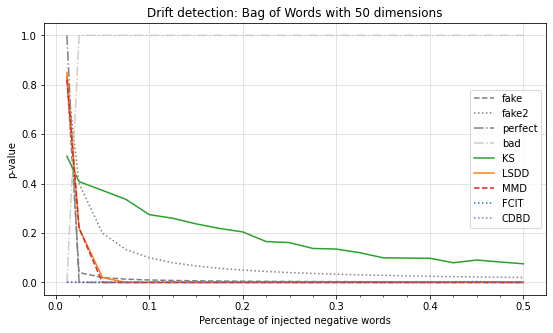

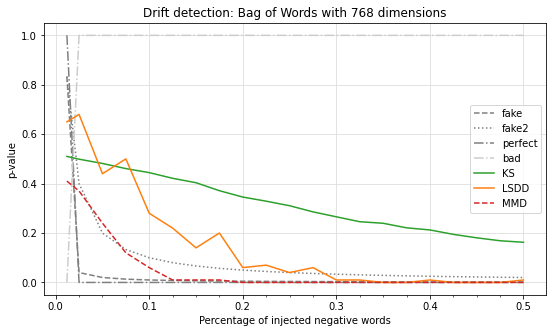

In [10]:
# applies method on arrays 'expected' and all results 'drift_predictions'
def evaluate_ext(method, factor_penalty, print_info = False):
    eval_results = {}
    for data_id in results:
        data_id_results = {}
        for detector_id in results[data_id]:
            if(print_info):
                print()
                print(data_id, detector_id)
            data_id_results[detector_id] = method(negative_words_percentage, results[data_id][detector_id]['predictions'], factor_penalty, print_info)
        eval_results[data_id] = data_id_results
    return eval_results

# prints lists of tuples
def print_eval_ext(eval_results, reverse, factor_penalty):
    if(reverse):
        print("Final scores (higher values are better)")
    else:
        print("Final scores (lower values are better)")
    print("factor_penalty ", factor_penalty)
    for data_id in eval_results:
        print(data_id)
        sorted_results = sorted(eval_results[data_id].items(), key=lambda item: item[1], reverse=reverse)
        for i in range(len(sorted_results)):
            print(str("{:.4f}".format(sorted_results[i][1])).zfill(10), sorted_results[i][0])
    print()

def eval_metric_ext(negative_words_percentage, p_values, factor_penalty, print_info):
    
    # remove first element (no injected drift)
    neg_words_perc = negative_words_percentage[1:]
    p_vals = p_values[1:]
        
    # Scores 0 (bad) to 1 (good)
    scores = []
    for i in range(len(p_vals)):
        scores.append(1 - p_vals[i])
    if(print_info):
        print(" difference score ", round(numpy.sum(scores), 4))
    
    # No injected drift in first element
    # High penalty for low p-value
    penalty = (1 - p_values[0]) * factor_penalty
    for i in range(len(scores)):
        scores[i] = (scores[i] - penalty)
    if(print_info):
        print(" penalty ", round(penalty, 4), "= 1 -", round(p_values[0], 4))
        print(round(numpy.sum(scores), 4), "penalty score")
        
    # Earlier drift detection is better (sensitivity)
    sum_rating = 0
    for i in range(len(scores)):
        rating = 1/neg_words_perc[i]
        sum_rating += rating
        scores[i] = scores[i] * rating
    
    if(print_info):
        print(" scores ", numpy.round(scores, 2))
        print(" sum_rating ", round(sum_rating, 4))
        print(" result ", round(numpy.sum(scores) / sum_rating, 4))
    
    return numpy.sum(scores) / sum_rating

print_info = False
factor_penalty = 1
print_eval_ext(evaluate_ext(eval_metric_ext, factor_penalty, print_info), True, factor_penalty)
factor_penalty = 0
print_eval_ext(evaluate_ext(eval_metric_ext, factor_penalty, print_info), True, factor_penalty)
factor_penalty = .5
print_eval_ext(evaluate_ext(eval_metric_ext, factor_penalty, print_info), True, factor_penalty)

if(True):
    plot_results()

**Extension by weighted penalty**  
$\alpha = 1$ is like the previous evaluation version (For bow_768 LSDD > MMD was unclear)  
$\alpha = 0$ removes the penalty completely (Bad for detectors like FCIT in bow_50)  
$\alpha = .5$ is also bad, as FCIT > KS in bow_50  

# Evaluation metric (Version C with penalty-weighting and power)

$d$ drift detector  
$n$ number experiments  
$w_i$ percentage of injected negative words of experiment $i$   
$w_1=0$ experiment without injected drift  
$p_i$ p-value of experiment $i$  
$\alpha$ factor of penalty  
$\beta$ base for score weighting  

$S(d_i) = (1 - p_i) - \alpha\,(1 - p_1)$ evaluation score of experiment $i$ and detector $d$  

$S(d) = \sum_{i=2}^{n} \beta^\frac{1}{w_i} \cdot S(d_i) \cdot \left[ \sum_{i=2}^{n} \beta^\frac{1}{w_i} \right]^{-1} $  scores weighted by injection  

**Note:** Size of $\beta$ makes no difference, can be set to e.g. 2  
**Note:** First values are weighted very high. (e.g. KS is rated better than LSDD in dim-768, which is maybe missleading.)  

In [11]:
# applies method on arrays 'expected' and all results 'drift_predictions'
def evaluate_pow(method, factor_penalty, power_base, print_info = False):
    eval_results = {}
    for data_id in results:
        data_id_results = {}
        for detector_id in results[data_id]:
            if(print_info):
                print()
                print(data_id, detector_id)
            data_id_results[detector_id] = method(negative_words_percentage, results[data_id][detector_id]['predictions'], factor_penalty, power_base, print_info)
        eval_results[data_id] = data_id_results
    return eval_results

# prints lists of tuples
def print_eval_pow(eval_results, reverse, factor_penalty, power_base):
    if(reverse):
        print("Final scores (higher values are better)")
    else:
        print("Final scores (lower values are better)")
    print("factor_penalty", factor_penalty, "; power_base", power_base)
    for data_id in eval_results:
        print(data_id)
        sorted_results = sorted(eval_results[data_id].items(), key=lambda item: item[1], reverse=reverse)
        for i in range(len(sorted_results)):
            print(str("{:.4f}".format(sorted_results[i][1])).zfill(10), sorted_results[i][0])
    print()

def eval_metric_pow(negative_words_percentage, p_values, factor_penalty, power_base, print_info):
    
    # remove first element (no injected drift)
    neg_words_perc = negative_words_percentage[1:]
    p_vals = p_values[1:]
        
    # Scores 0 (bad) to 1 (good)
    scores = []
    for i in range(len(p_vals)):
        scores.append(1 - p_vals[i])
    if(print_info):
        print(" difference score ", round(numpy.sum(scores), 4))
    
    # No injected drift in first element
    # High penalty for low p-value
    penalty = (1 - p_values[0]) * factor_penalty
    for i in range(len(scores)):
        scores[i] = (scores[i] - penalty)
    if(print_info):
        print(" penalty ", round(penalty, 4), "= 1 -", round(p_values[0], 4))
        print(round(numpy.sum(scores), 4), "penalty score")
        
    # Earlier drift detection is better (sensitivity)
    sum_rating = 0
    for i in range(len(scores)):
        rating = pow(power_base, 1/neg_words_perc[i])
        sum_rating += rating
        scores[i] = scores[i] * rating
    
    if(print_info):
        print(" scores ", numpy.round(scores, 2))
        print(" sum_rating ", round(sum_rating, 4))
        print(" result ", round(numpy.sum(scores) / sum_rating, 4))
    
    return numpy.sum(scores) / sum_rating

print_info = False

factor_penalty = 0
power_base = 100
print_eval_pow(evaluate_pow(eval_metric_pow, factor_penalty, power_base, print_info), True, factor_penalty, power_base)

factor_penalty = 0
power_base = 2
print_eval_pow(evaluate_pow(eval_metric_pow, factor_penalty, power_base, print_info), True, factor_penalty, power_base)

factor_penalty = 1
power_base = 2
print_eval_pow(evaluate_pow(eval_metric_pow, factor_penalty, power_base, print_info), True, factor_penalty, power_base)

if(False):
    plot_results()

Final scores (higher values are better)
factor_penalty 0 ; power_base 100
bow_50
00001.0000 CDBDDetector
00001.0000 perfect
00000.9995 FCITDetector
00000.9600 fake
00000.7800 AlibiMMDDetector
00000.7800 AlibiLSDDDetector
00000.6000 fake2
00000.5921 AlibiKSDetector
00000.0000 bad
bow_768
00001.0000 perfect
00000.9600 fake
00000.6300 AlibiMMDDetector
00000.6000 fake2
00000.5011 AlibiKSDetector
00000.3200 AlibiLSDDDetector
00000.0000 bad

Final scores (higher values are better)
factor_penalty 0 ; power_base 2
bow_50
00001.0000 CDBDDetector
00001.0000 perfect
00000.9995 FCITDetector
00000.9600 fake
00000.7800 AlibiMMDDetector
00000.7800 AlibiLSDDDetector
00000.6000 fake2
00000.5921 AlibiKSDetector
00000.0000 bad
bow_768
00001.0000 perfect
00000.9600 fake
00000.6300 AlibiMMDDetector
00000.6000 fake2
00000.5011 AlibiKSDetector
00000.3200 AlibiLSDDDetector
00000.0000 bad

Final scores (higher values are better)
factor_penalty 1 ; power_base 2
bow_50
00001.0000 perfect
00000.7933 fake
00000.63